# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

signnames = pd.read_csv('signnames.csv')

training_file = './data/train.p'
validation_file='./data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

def inspectDataSetSize():
    assert(len(X_train) == len(y_train))
    assert(len(X_valid) == len(y_valid))
    assert(len(X_test) == len(y_test))
    
    ntrain = len(y_train)
    nvalid = len(y_valid)
    ntest = len(y_test)
    
    print("Number of training examples =", ntrain)
    print("Number of validation examples =", nvalid)
    print("Number of testing examples =", ntest)
    
    return ntrain, nvalid, ntest

def inspectImageSize():
    image_shape_test = X_test.shape[1:]
    image_shape_train = X_train.shape[1:]
    image_shape_valid = X_valid.shape[1:]
    
    print("Train image data shape =", image_shape_train)
    print("Validation image data shape =", image_shape_valid)
    print("Test image data shape =", image_shape_test)

def inspectClasses():
    print("Number of train classes =", np.unique(y_train).size)
    print("Number of test classes =", np.unique(y_test).size)
    print("Number of valid classes =", np.unique(y_valid).size)
    return np.unique(y_train).size, np.unique(y_train)


In [3]:
ntrain, nvalid, ntest = inspectDataSetSize()
nclasses, classes = inspectClasses()

inspectImageSize()


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Number of train classes = 43
Number of test classes = 43
Number of valid classes = 43
Train image data shape = (32, 32, 3)
Validation image data shape = (32, 32, 3)
Test image data shape = (32, 32, 3)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline
def inspectClassesBinCount():
    pltChangeSize()
    
    plt.hist(y_train, bins=nclasses, label='train')
    plt.hist(y_test, bins=nclasses, label='test')
    plt.hist(y_valid, bins=nclasses, label='valid')

    plt.title('Image classes Histogram')  
    plt.xlabel('Classes')  
    plt.ylabel('Counts')  
    plt.legend()  

def pltChangeSize():
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size

classes: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


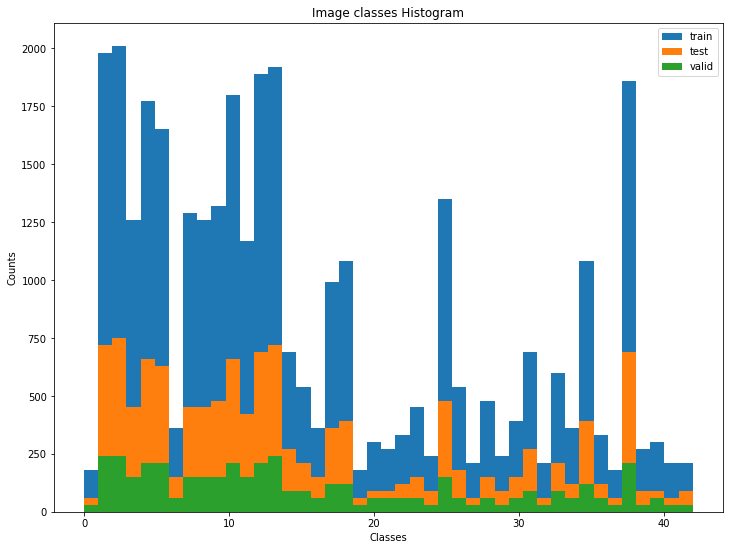

In [5]:
print("classes: \n", classes)
inspectClassesBinCount()

[[0 'Speed limit (20km/h)']]


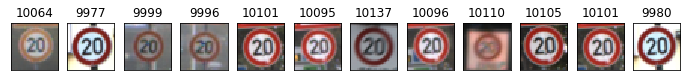

[[1 'Speed limit (30km/h)']]


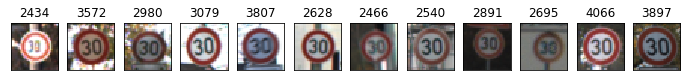

[[2 'Speed limit (50km/h)']]


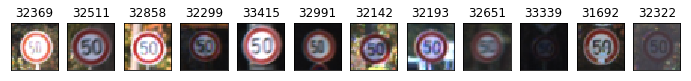

[[3 'Speed limit (60km/h)']]


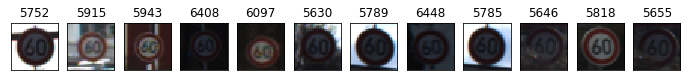

[[4 'Speed limit (70km/h)']]


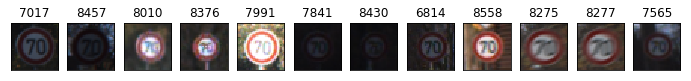

[[5 'Speed limit (80km/h)']]


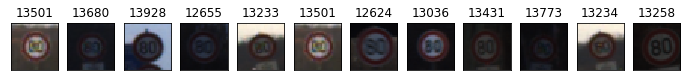

[[6 'End of speed limit (80km/h)']]


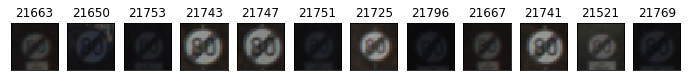

[[7 'Speed limit (100km/h)']]


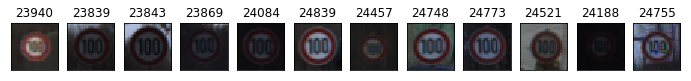

[[8 'Speed limit (120km/h)']]


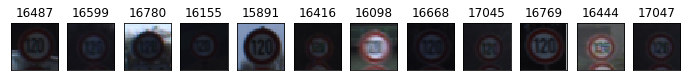

[[9 'No passing']]


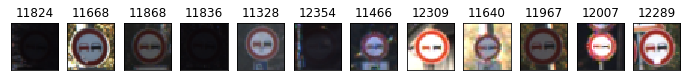

[[10 'No passing for vehicles over 3.5 metric tons']]


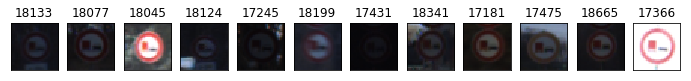

[[11 'Right-of-way at the next intersection']]


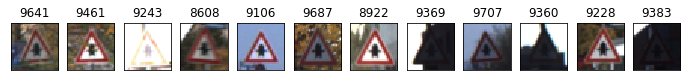

[[12 'Priority road']]


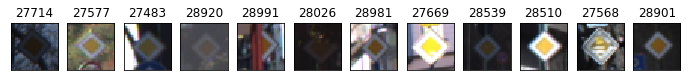

[[13 'Yield']]


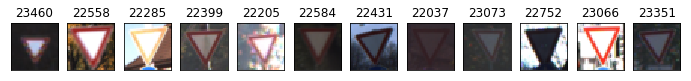

[[14 'Stop']]


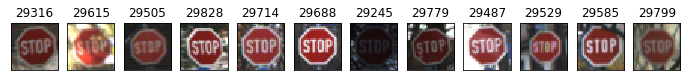

[[15 'No vehicles']]


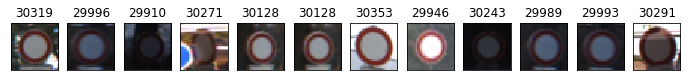

[[16 'Vehicles over 3.5 metric tons prohibited']]


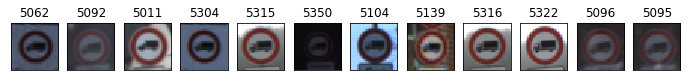

[[17 'No entry']]


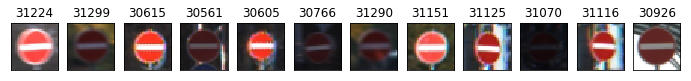

[[18 'General caution']]


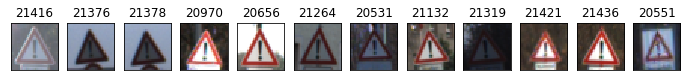

[[19 'Dangerous curve to the left']]


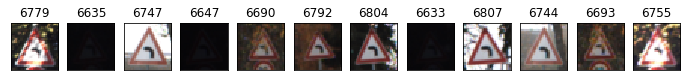

[[20 'Dangerous curve to the right']]


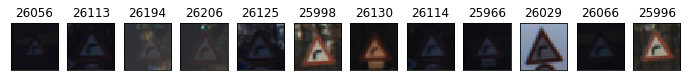

[[21 'Double curve']]


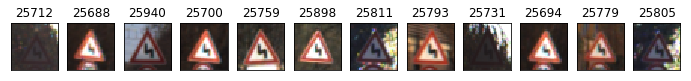

[[22 'Bumpy road']]


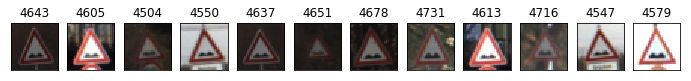

[[23 'Slippery road']]


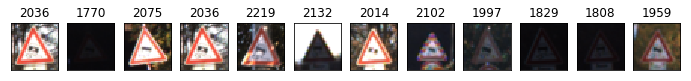

[[24 'Road narrows on the right']]


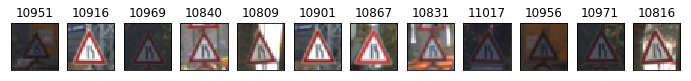

[[25 'Road work']]


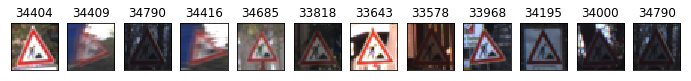

[[26 'Traffic signals']]


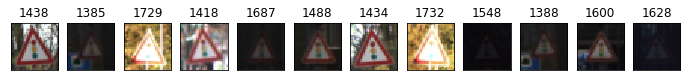

[[27 'Pedestrians']]


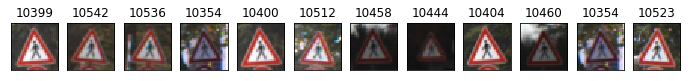

[[28 'Children crossing']]


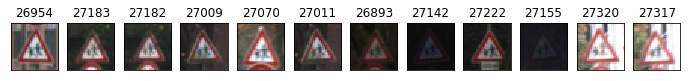

[[29 'Bicycles crossing']]


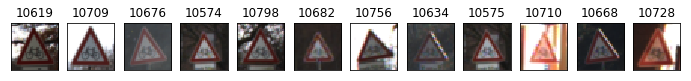

[[30 'Beware of ice/snow']]


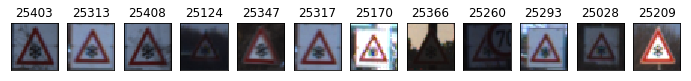

[[31 'Wild animals crossing']]


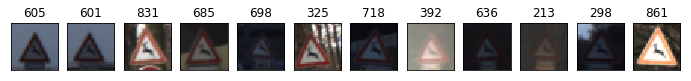

[[32 'End of all speed and passing limits']]


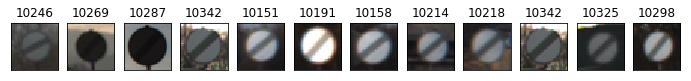

[[33 'Turn right ahead']]


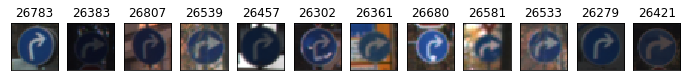

[[34 'Turn left ahead']]


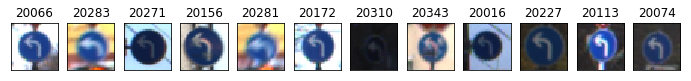

[[35 'Ahead only']]


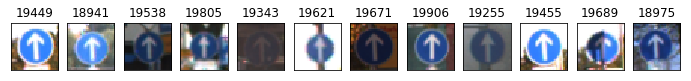

[[36 'Go straight or right']]


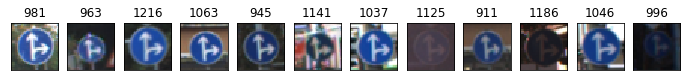

[[37 'Go straight or left']]


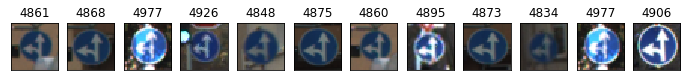

[[38 'Keep right']]


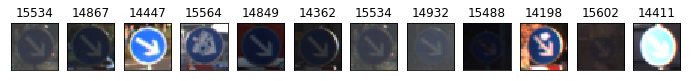

[[39 'Keep left']]


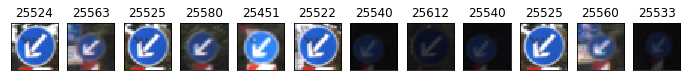

[[40 'Roundabout mandatory']]


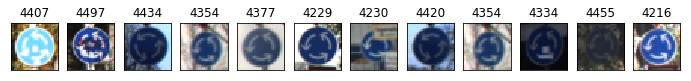

[[41 'End of no passing']]


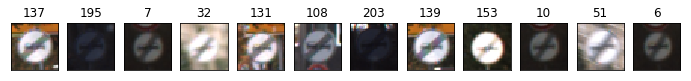

[[42 'End of no passing by vehicles over 3.5 metric tons']]


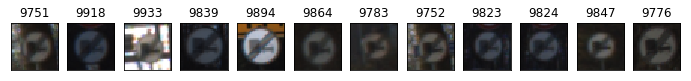

In [6]:
def plotImagesForClasses():
    for cls in classes:
        fig, axes = plt.subplots(ncols=12, figsize=(12, 1))
        signName = signnames[signnames['ClassId'] == cls]
        
        print(signName.values)
        idxs = np.where(y_train==cls)[0]

        i = 0 
        for i in range(12):
            idx = random.choice(idxs)
            
            axes[i].set_xticks([])
            axes[i].set_yticks([])
            axes[i].set_title(idx)
            axes[i].imshow(X_train[idx])

        plt.show()
            

    
plotImagesForClasses()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2

def histogramNormalized(img):
    for c in range(0, 2):
        img[:,:,c] = cv2.equalizeHist(img[:,:,c])
    return img

def meanCentralized(X_train, X_test, X_valid):
    image_Mean_Train = np.mean(X_train, axis = (0,1,2))
    image_Mean_Test = np.mean(X_test, axis = (0,1,2))
    image_Mean_Valid = np.mean(X_valid, axis = (0,1,2))

    X_train = (X_train - np.tile(image_Mean_Train, (32,32)).reshape(32,32,3)) / 180
    X_test = (X_test - np.tile(image_Mean_Test, (32,32)).reshape(32,32,3)) / 180
    X_valid = (X_valid - np.tile(image_Mean_Valid, (32,32)).reshape(32,32,3)) / 180
    return X_train, X_test, X_valid

def histogramNormalizeAll(X_train, X_test, X_valid):
    for img in X_train:
        img = histogramNormalized(img)
    for img in X_test:
        img = histogramNormalized(img)
    for img in X_valid:
        img = histogramNormalized(img)    
        
histogramNormalizeAll(X_train, X_test, X_valid)

print('before mean normalization, {:.3f}'.format(np.mean(X_train, axis = (0,1,2))[0]))
X_train, X_test, X_valid = meanCentralized(X_train, X_test, X_valid)
print('after mean normalization, {:.3f}'.format(np.mean(X_train, axis = (0,1,2))[0]))

before mean normalization, 131.453
after mean normalization, 0.000


### Model Architecture

In [8]:
###### import tensorflow as tf
from tensorflow.contrib.layers import flatten
import tensorflow as tf


In [9]:

EPOCHS = 10
BATCH_SIZE = 32
rate = 0.001

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def leakyRelu(x, alpha=0.01):
    return tf.maximum(alpha*x,x)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 64), mean = mu, stddev = sigma), name='conv1_w')
    conv1_b = tf.Variable(tf.zeros(64), name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = leakyRelu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
#    conv1 = tf.nn.dropout(conv1, 0.7)
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma), name='conv2_w')
    conv2_b = tf.Variable(tf.zeros(128), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = leakyRelu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 3: Convolutional. Output = 10x10x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 256), mean = mu, stddev = sigma), name='conv3_w')
    conv3_b = tf.Variable(tf.zeros(256), name='conv3_b')
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # SOLUTION: Activation.
    conv3 = leakyRelu(conv3)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
#    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(6400, 1024), mean = mu, stddev = sigma), name='fc1_w')
    fc1_b = tf.Variable(tf.zeros(1024), name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W)  + fc1_b
    
    # SOLUTION: Activation.
    fc1    = leakyRelu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 256), mean = mu, stddev = sigma), name='fc2_w')
    fc2_b  = tf.Variable(tf.zeros(256), name='fc2_b')
    fc2    = tf.matmul(fc1, fc2_W)  + fc2_b
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma), name='fc3_w')
    fc3_b  = tf.Variable(tf.zeros(128), name='fc3_b')
    fc3    = tf.matmul(fc2, fc3_W)  + fc3_b    
    # SOLUTION: Activation.
    fc3    = leakyRelu(fc3)
    fc3 = tf.nn.dropout(fc3, 0.7)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(128, nclasses), mean = mu, stddev = sigma), name='fc4_w')
    fc4_b  = tf.Variable(tf.zeros(nclasses), name='fc4_b')
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, nclasses)

logits = LeNet(x)
vars   = tf.trainable_variables() 

lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in vars
                    if '_b' not in v.name ]) * 0.0003

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y) + lossL2
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
def runOnce(X_train, y_train):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        matrix_train = []
        matrix_valid = []

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, int(num_examples ), BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            training_accuracy, training_loss = evaluate(X_train, y_train)   
            validation_accuracy, validation_loss = evaluate(X_valid, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Training acu/loss; Validation acu/loss = {:.3f} / {:.3f}; {:.3f} / {:.3f}".format(training_accuracy, training_loss, validation_accuracy, validation_loss))
            print()
            matrix_train.append(training_accuracy)
            matrix_valid.append(validation_accuracy)
        saver.save(sess, './lenet')
        print("Model saved")
        return matrix_valid[9]
accuracy=0
%time
for i in range(1):
    accuracy += runOnce(X_train, y_train)
print('Average accuracy: {:.3f}'.format(accuracy))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs
Training...

EPOCH 1 ...
Training acu/loss; Validation acu/loss = 0.949 / 4.027; 0.901 / 4.222

EPOCH 2 ...
Training acu/loss; Validation acu/loss = 0.977 / 2.116; 0.922 / 2.327

EPOCH 3 ...
Training acu/loss; Validation acu/loss = 0.983 / 1.176; 0.952 / 1.294

EPOCH 4 ...
Training acu/loss; Validation acu/loss = 0.983 / 0.717; 0.945 / 0.892

EPOCH 5 ...
Training acu/loss; Validation acu/loss = 0.987 / 0.513; 0.949 / 0.664

EPOCH 6 ...
Training acu/loss; Validation acu/loss = 0.993 / 0.352; 0.962 / 0.483

EPOCH 7 ...
Training acu/loss; Validation acu/loss = 0.984 / 0.352; 0.956 / 0.483

EPOCH 8 ...
Training acu/loss; Validation acu/loss = 0.988 / 0.281; 0.942 / 0.459

EPOCH 9 ...
Training acu/loss; Validation acu/loss = 0.996 / 0.219; 0.968 / 0.327

EPOCH 10 ...
Training acu/loss; Validation acu/loss = 0.997 / 0.216; 0.968 / 0.336

Model saved
Average accuracy: 0.968


In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, test_loss = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}, Loss = {:.3f}".format(test_accuracy, test_loss))

Test Accuracy = 0.951, Loss = 0.430


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

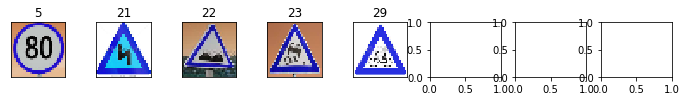

before mean normalization, 139.143
after mean normalization, -0.000


In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpim
import glob

lables = [0, 5, 21, 22, 23, 28, 29]
    
def get_im_cv2(path):
    img = cv2.imread(path)
    resized = cv2.resize(img, (32, 32), cv2.INTER_LINEAR)
    return resized

def load_test():
    X_test = []
    X_test_id = []
    for lable in lables:
        path = os.path.join('.', 'testing_data', str(lable), '*.jpeg')
        files = sorted(glob.glob(path))
        
        for fl in files:
            flbase = os.path.basename(fl)
            img = get_im_cv2(fl)
            X_test.append(img)
            X_test_id.append(lable)

    return X_test, X_test_id

X_test_real, X_test__real_id = load_test()

def plotImagesForClasses():
    fig, axes = plt.subplots(ncols=8, figsize=(12, 1))
    i = 0 
    for image, idx in zip(X_test_real, X_test__real_id):
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_title(idx)
        axes[i].imshow(image)
        i += 1
    plt.show()
    
plotImagesForClasses()

for img in X_test_real:
    img = histogramNormalized(img)

print('before mean normalization, {:.3f}'.format(np.mean(X_test_real, axis = (0,1,2))[0]))

image_Mean_Train = np.mean(X_test_real, axis = (0,1,2))
X_test_real = (X_test_real - np.tile(image_Mean_Train, (32,32)).reshape(32,32,3)) / 180

print('after mean normalization, {:.3f}'.format(np.mean(X_test_real, axis = (0,1,2))[0]))

### Predict the Sign Type for Each Image

In [14]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top_5_operation = tf.nn.top_k(logits, k=5)

def evaluate_with_cross_entropy(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    
    accuracy, loss, cross_entropy_values, cross_entropy_ids = sess.run([accuracy_operation, loss_operation, top_5_operation[0], top_5_operation[1]], feed_dict={x: X_data, y: y_data})
    total_accuracy += (accuracy * len(X_data))
    total_loss += (loss * len(X_data))

    return total_accuracy / num_examples, total_loss / num_examples, cross_entropy_ids, cross_entropy_values

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, test_loss, cross_entropy_ids, cross_entropy_values = evaluate_with_cross_entropy(X_test_real, X_test__real_id)

    print("Test Accuracy = {:.3f}, Loss = {:.3f}".format(test_accuracy, test_loss))
    print("Top 5 cross entropy")
    i = 0
    for ids, ps in zip(cross_entropy_ids, cross_entropy_values):
        print("Image {}, real label {}".format(i, X_test__real_id[i]))
        print("top 5 classes:", ids)
        print("probability:", ps)
        print()
        i += 1


Test Accuracy = 0.200, Loss = 15.533
Top 5 cross entropy
Image 0, real label 5
top 5 classes: [ 2  4 38 36  1]
probability: [ 32.93254852  14.48922062  11.68265152  11.54993439   8.5348711 ]

Image 1, real label 21
top 5 classes: [12 11 21 42 10]
probability: [ 14.2425127    9.26583385   7.55679941   4.19406271   1.72866535]

Image 2, real label 22
top 5 classes: [22 10 25  3  6]
probability: [ 34.05734253   7.88766718   5.19900179   4.36709929   3.5581634 ]

Image 3, real label 23
top 5 classes: [11 21  2 27  9]
probability: [ 33.57806396  27.75547981  12.51885319   4.91595173   2.92011666]

Image 4, real label 29
top 5 classes: [11 28  9 20  3]
probability: [ 4.31466913  2.51659632  2.28277302  2.21723866  2.1602664 ]



### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 